# Classic mashine learning

Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією. Отож розіб'ємо наше домашнє завдання на декілька частин:

напишіть функцію гіпотези лінійної регресії у векторному вигляді;

створіть функцію для обчислення функції втрат у векторному вигляді;

реалізуйте один крок градієнтного спуску;

знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

знайдіть ці ж параметри за допомогою аналітичного рішення;

порівняйте отримані результати.


Дз повинно бути виконано у Jupyter Nootebook,(або Google Colab) і задеплоїне на Гітхаб у вигляді файлу .ipynb.

### Import libery

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. The linear regression hypothesis function in vector form:

$$ h(x) = w_0 + w_1x $$

 x   is  input variable,
 w_0, w_1  is weights to be found

### 2. Function for calculating the loss function in vector form:

$$ J(\vec{w}) = \frac{1}{2m} \left( \vec{h}(\vec{w}, \mathbf{X}) - \vec{Y} \right)^2 $$
*m* is number of training examples in our dataset

### 3. Implement one step of gradient descent:

*The gradient vector of the loss function has the form:*

$$ \vec{\nabla} J = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\mathrm{X}\vec{w} - \vec{Y} )  = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\vec{h} - \vec{Y} ). $$

### 4. Let's start working with our dataset:

In [28]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


*Normalize our data by the mean value so that all the values of our features are approximately the same:*

In [29]:
def normalize(data):
    mean = np.mean(data)
    value_range = max(data) - min(data)

    result = []
    for i in data:
        result.append((i-mean)/value_range)
    return result

In [30]:
norm = pd.DataFrame()
norm['price'] = normalize(df['price'])
norm['bedrooms'] = normalize(df['bedrooms'])
norm['bathrooms'] = normalize(df['bathrooms'])
norm['area'] = normalize(df['area'])
norm.head()

,price,bedrooms,bathrooms,area
0,0.738811,0.206972,0.237920,0.155977
1,0.647902,0.206972,0.904587,0.261818
2,0.647902,0.006972,0.237920,0.330547
3,0.644872,0.206972,0.237920,0.161475
4,0.575175,0.206972,-0.095413,0.155977


In [31]:
def hypo(X, w):
    return np.dot(X, w)

In [32]:
def loss(X, y, w):
    m = len(y)
    h = hypo(X, w)
    return (1/(2*m)) * np.sum((h - y)**2)

In [33]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    h = hypo(X, w)
    gradient = (1/m) * np.dot(X.T, (h - y))
    w = w - learning_rate * gradient
    return w

In [34]:
def grad_descent(X, y, w, learning_rate=0.01, num_iterations=10500): 

    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
    return w

In [35]:
X = norm[['area', 'bedrooms', 'bathrooms']]
y = norm['price']

# We add a column of units ('1') for w
X = np.c_[np.ones(len(X)), X]

# We initialize the vector of parameters w
w = np.zeros(X.shape[1])
w = grad_descent(X, y, w)
print(loss(X, y, w))
print("Optimal parameters w:", w)

0.0067304808691495506
Optimal parameters w: [4.90372269e-17 4.38827698e-01 1.88502356e-01 3.55072522e-01]


*Plotting the training data:*

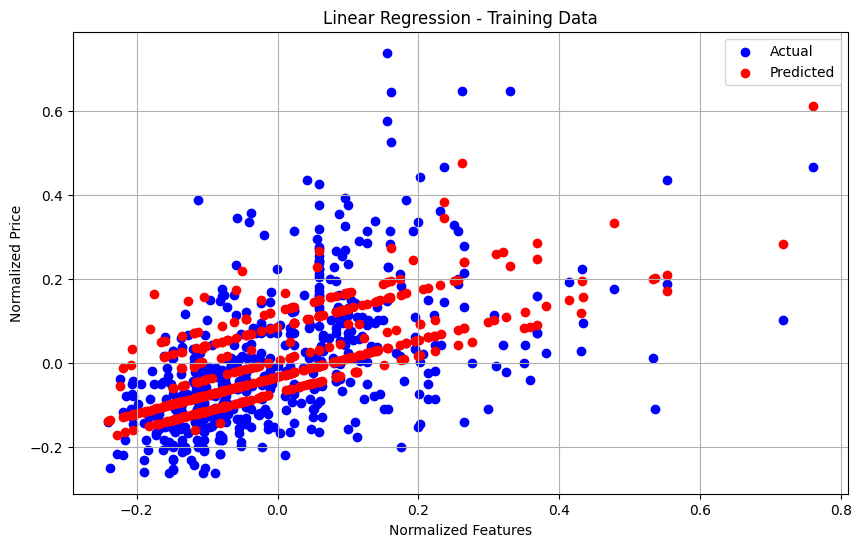

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue', label='Actual')
plt.scatter(X[:, 1], np.dot(X, w), color='red', label='Predicted')
plt.title('Linear Regression - Training Data')
plt.xlabel('Normalized Features')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.show()

### 5. Calculation of parameters by analytical method:

*Let's use the formula to calculate parameters w according to the normal equation:*

$$ w = (X^T X)^{-1} X^T y $$


In [37]:
w_a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [38]:
print("The optimal parameters of 'w' are obtained by the analytical method:", w_a)

The optimal parameters of 'w' are obtained by the analytical method: [4.74427517e-17 4.77142690e-01 1.76112569e-01 3.60012857e-01]


*We compare the obtained results:*


In [39]:
loss_gradient_descent = loss(X, y, w)
loss_analytical_solution = loss(X, y, w_a)

print("Loss function (gradient descent):", loss_gradient_descent)
print("Loss function (analytical solution):", loss_analytical_solution)

Loss function (gradient descent): 0.0067304808691495506
Loss function (analytical solution): 0.006713405108514905
